In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
from pymodulon.enrichment import *
from sklearn.metrics import jaccard_score
from pymodulon.util import explained_variance
from pymodulon.core import IcaData

In [2]:
# p1k data
p1k_A = pd.read_csv('../data/p1k/A.csv', index_col=0)
p1k_M = pd.read_csv('../data/p1k/M.csv', index_col=0)
imodulon_table = pd.read_csv('../data/p1k/iM_table.csv', index_col=1)
p1k_genes = pd.read_csv('../data/p1k/gene_info.csv', index_col=0)
p1k_genes.index.name = 'locus'
sample_data = pd.read_csv('../data/p1k/sample_table.csv', index_col=0)
p1k_X = pd.read_csv('../data/p1k/log_tpm.csv', index_col=0)

p1k_A.index = imodulon_table.index
p1k_M.columns = imodulon_table.index

p1k_gene_presence = pd.read_csv('../data/p1k/gene_presence_matrix.csv', index_col=0).astype(int)
p1k_gene_presence.columns = imodulon_table.index

In [3]:
# fast ICA
fICA_gene_presence = pd.read_csv('../data/Fast_ICA/Fast_ICA_Gene_Presence_Matrix.csv', index_col=0).astype(int)
fICA_A = pd.read_csv('../data/Fast_ICA/A_Fast_ICA.csv', index_col=0).T
fICA_M = pd.read_csv('../data/Fast_ICA/M_Fast_ICA.csv', index_col=0)

In [4]:
# dictionary learning
dl_gene_presence = pd.read_csv('../data/Dictionary_Learning/Dictionary_Learning_Gene_Presence_Matrix.csv', index_col=0).astype(int)
dl_A = pd.read_csv('../data/Dictionary_Learning/A_Dictionary_Learning.csv', index_col=0).T

In [5]:
# Factor Analysis
fa_gene_presence = pd.read_csv('../data/Factor_Analysis/Factor_Analysis_Gene_Presence_Matrix.csv', index_col=0).astype(int)
fa_A = pd.read_csv('../data/Factor_Analysis/A_Factor_Analysis.csv', index_col=0).T

In [6]:
# Inc PCA
incPCA_gene_presence = pd.read_csv('../data/IncrementalPCA/Incremental_PCA_Gene_Presence_Matrix.csv', index_col=0).astype(int)
incPCA_A = pd.read_csv('../data/IncrementalPCA/A_IncrementalPCA.csv', index_col=0).T

In [7]:
# Infomax ICA
imICA_gene_presence = pd.read_csv('../data/InfoMax_ICA/InfoMax_ICA_Gene_Presence_Matrix.csv', index_col=0).astype(int)
imICA_A = pd.read_csv('../data/InfoMax_ICA/proc_A.csv')
imICA_A.index = imICA_gene_presence.columns

In [8]:
# iPCA
iPCA_gene_presence = pd.read_csv('../data/IPCA/Independent_PCA_Gene_Presence_Matrix.csv', index_col=0).astype(int)
iPCA_A = pd.read_csv('../data/IPCA/loadings_variables_ipca.csv', index_col=0).T

In [9]:
# NMF
NMF_gene_presence = pd.read_csv('../data/NMF/NMF_Gene_Presence_Matrix.csv', index_col=0).astype(int)
NMF_A = pd.read_csv('../data/NMF/A_NMF.csv', index_col=0).T

In [10]:
# PCA
PCA_gene_presence = pd.read_csv('../data/PCA/PCA_Gene_Presence_Matrix.csv', index_col=0).astype(int)
PCA_A = pd.read_csv('../data/PCA/A_PCA.csv', index_col=0).T

In [11]:
# Picard ICA
pICA_gene_presence = pd.read_csv('../data/Picard_ICA/Picard_ICA_Gene_Presence_Matrix.csv', index_col=0).astype(int)
pICA_A = pd.read_csv('../data/Picard_ICA/proc_A.csv')
pICA_A.columns = fICA_A.columns
pICA_A.index = pICA_gene_presence.columns

In [12]:
# sIPCA
siPCA_gene_presence = pd.read_csv('../data/sIPCA/Sparse_Independent_PCA_Gene_Presence_Matrix.csv', index_col=0).astype(int)
siPCA_A = pd.read_csv('../data/sIPCA/loadings_variables_sipca.csv', index_col=0).T

In [13]:
# SparseICA
sICA_gene_presence = pd.read_csv('../data/Sparse_ICA_R/Sparse_ICA_Gene_Presence_Matrix.csv', index_col=0).astype(int)
sICA_A = pd.read_csv('../data/Sparse_ICA_R/A_sparse_ICA_0_8.csv')
sICA_A.index = sICA_gene_presence.columns

In [14]:
# Sparse Coder
sc_gene_presence = pd.read_csv('../data/SparseCoder/SparseCoder_Gene_Presence_Matrix.csv', index_col=0).astype(int)
sc_A = pd.read_csv('../data/SparseCoder/A_SparseCoder.csv', index_col=0).T

In [15]:
A_matrices = {'Fast ICA': fICA_A, 'Dictionary Learning': dl_A, 'Factor Analysis':fa_A, 'Incremental PCA':incPCA_A, 'InfoMax ICA':imICA_A, 'Independent PCA':iPCA_A, 'NMF':NMF_A,
              'PCA':PCA_A, 'Picard ICA':pICA_A, 'Sparse Independent PCA':siPCA_A, 'Sparse ICA':sICA_A, 'Sparse Coding':sc_A}
gp_matricies = {'Fast ICA': fICA_gene_presence, 'Dictionary Learning': dl_gene_presence, 'Factor Analysis':fa_gene_presence, 'Incremental PCA':incPCA_gene_presence, 
                'InfoMax ICA':imICA_gene_presence, 'Independent PCA':iPCA_gene_presence, 'NMF':NMF_gene_presence,
                'PCA':PCA_gene_presence, 'Picard ICA':pICA_gene_presence, 'Sparse Independent PCA':siPCA_gene_presence, 'Sparse ICA':sICA_gene_presence, 'Sparse Coding':sc_gene_presence}

In [16]:
order = [
    'PCA', 'Incremental PCA', 'Independent PCA', 'Sparse Independent PCA',
    'Fast ICA', 'InfoMax ICA', 'Picard ICA', 'Sparse ICA', 'NMF',
    'Factor Analysis', 'Dictionary Learning', 'Sparse Coding'
]

# Reordering the dictionaries based on the order provided
A_matrices = {key: A_matrices[key] for key in order}
gp_matricies = {key: gp_matricies[key] for key in order}

In [17]:
# NCA Results full trn
NCA_A = pd.read_csv('../data/NCA/full_trn/NCA_Activity.csv', index_col=0)
NCA_gene_presence = pd.read_csv('../data/NCA/full_trn/NCA_A_TRN.csv', index_col=0)

gene_mapping = pd.read_csv('../data/p1k/Gene-Name-from-All-genes-of-E.-coli-K-12-substr.-MG1655.txt', sep='\t')
gene_mapping.columns = ['gene_names', 'locus', 'synonyms']
gene_mapping = gene_mapping.replace({'phnE1':'phnE', 'lfgA':'yfjX', 'lfgB':'yfjY', 'lptM':'yifL'})
gene_mapping = gene_mapping[gene_mapping.locus.isin(p1k_genes.index)]

def get_locus_tag(gene_name):
    if gene_name in gene_mapping.gene_names.values:
        return gene_mapping.reset_index().set_index('gene_names').loc[gene_name, 'locus']
    else: # one edge case, gene ruled pseudogene
        return 'b3681'

# NCA_gene_presence.index = [p1k_genes.reset_index().set_index('gene_name').loc[x, 'locus'] for x in NCA_gene_presence.index]
# NCA_gene_presence = NCA_gene_presence.reindex(p1k_gene_presence.index, fill_value=0)
NCA_gene_presence.index.name = 'gene_name'
NCA_gene_presence = NCA_gene_presence.reset_index()
NCA_gene_presence['locus'] = NCA_gene_presence.gene_name.apply(lambda x: get_locus_tag(x))
NCA_gene_presence = NCA_gene_presence.set_index('locus')
NCA_gene_presence = NCA_gene_presence.drop('gene_name', axis=1).astype(int)

trn_test = NCA_gene_presence
trn_test = trn_test.T.rename_axis('Source')\
  .reset_index()\
  .melt('Source', value_name='Weight', var_name='Target')\
  .query('Source != Target')\
  .reset_index(drop=True)
trn_test = trn_test.drop(trn_test[trn_test.Weight == 0].index)
trn_test.columns = ['regulator','gene_id','effect']
trn = trn_test

In [18]:
# decouler results
dc_A = pd.read_csv('../data/decoupleR/decouler_ulm.csv', index_col=0).T
dc_A_wsum = pd.read_csv('../data/decoupleR/decouler_wsum.csv', index_col=0).T
dc_A_udt = pd.read_csv('../data/decoupleR/decouler_udt.csv', index_col=0).T

# Compare correlations accross all methods
Correlations are all of the top enrichments statistically for each component, with a minimum of fdr 10^-5. The best correlated component is isolated for each regulator for plotting.

In [19]:
def calculate_correlations(df_ICA, df_NCA, list_ICA, list_NCA):
    correlation_dict = {}
    for ica, nca in zip(list_ICA, list_NCA):
        row_A = df_ICA.loc[ica]  # Get the row matrix method
        row_NC = df_NCA.loc[nca]  # Get the row from TRN based method
        
        if not row_A.isnull().any() and not row_NC.isnull().any():  # Check for null values
            correlation = np.corrcoef(row_A, row_NC)[0, 1]  # Calculate correlation
        else:
            correlation = np.nan  # Assign NaN if there are any nulls in the row data
        
        correlation_dict[ica] = abs(correlation)
        
        sorted_correlation_dict = dict(sorted(correlation_dict.items(), key=lambda item: item[1], reverse=True))

    return sorted_correlation_dict

In [20]:
results_mapping = {}
for method, gene_matrix in tqdm(gp_matricies.items()):
    results = {}
    for ica_column in gene_matrix.columns:
        ica_genes = set(gene_matrix.index[gene_matrix[ica_column] == 1])
        trn_enrichment = compute_trn_enrichment(ica_genes,p1k_M.index,trn, fdr=1e-5)
        if len(trn_enrichment) >= 1:
            results[ica_column] = (trn_enrichment.iloc[0].name, trn_enrichment.iloc[0].qvalue)
    results_mapping[method] = results

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [02:08<00:00, 10.69s/it]


In [21]:
methods = ['PCA', 'incPCA', 'iPCA', 'sIPCA', 'fICA', 'imICA', 'pICA', 'sICA', 'NMF', 'fa', 'dict', 'sc']

In [22]:
# Mapping short names to full names
method_name_map = {
    'PCA': 'PCA',
    'incPCA': 'Incremental PCA',
    'iPCA': 'Independent PCA',
    'sIPCA': 'Sparse Independent PCA',
    'fICA': 'Fast ICA',
    'imICA': 'InfoMax ICA',
    'pICA': 'Picard ICA',
    'sICA': 'Sparse ICA',
    'NMF': 'NMF',
    'fa': 'Factor Analysis',
    'dict': 'Dictionary Learning',
    'sc': 'Sparse Coding'
}

# Replacing the short names with the full names
methods = [method_name_map[method] for method in methods]

methods

['PCA',
 'Incremental PCA',
 'Independent PCA',
 'Sparse Independent PCA',
 'Fast ICA',
 'InfoMax ICA',
 'Picard ICA',
 'Sparse ICA',
 'NMF',
 'Factor Analysis',
 'Dictionary Learning',
 'Sparse Coding']

In [41]:
# Correlations of all matrix factorization methods with NCA activities
# includes all of the components enriched for each method
# method chooses the highest correlated component for an enrichment for each regulator

df_correlations = pd.DataFrame(columns = ['reg', 'correlation', 'method'])

for method in methods:
    A = A_matrices[method]
    list_components = {key: x[0] for key, x in results_mapping[method].items()}

    correlations_nca = calculate_correlations(A.astype(float), NCA_A.astype(float), list_components.keys(), list_components.values())

    component_highest = {}
    for key, val in correlations_nca.items():
        comp = list_components[key]
        if comp not in component_highest.keys() or component_highest[comp][1] < val:
            component_highest[comp] = (key, val)

    
    component_highest = {key: (comp, val) for comp, (key, val) in component_highest.items()}

    for key, vals in component_highest.items():
        df_correlations.loc[str(method) + '_' + str(key)] = [vals[0], vals[1], method]

In [42]:
plt.style.use('default')

In [43]:
df_correlations

,reg,correlation,method
PCA_Component_2,RpoS,0.859047,PCA
PCA_Component_6,MalT,0.632613,PCA
PCA_Component_11,Fur,0.546274,PCA
PCA_Component_12,RhaS,0.380105,PCA
PCA_Component_4,FlhDC,0.340878,PCA
...,...,...,...
Sparse Coding_Component_99,BasR,0.082211,Sparse Coding
Sparse Coding_Component_199,HU,0.053515,Sparse Coding
Sparse Coding_Component_22,CsgD,0.031258,Sparse Coding
Sparse Coding_Component_82,CpxR,0.014995,Sparse Coding


In [44]:
df_correlations

,reg,correlation,method
PCA_Component_2,RpoS,0.859047,PCA
PCA_Component_6,MalT,0.632613,PCA
PCA_Component_11,Fur,0.546274,PCA
PCA_Component_12,RhaS,0.380105,PCA
PCA_Component_4,FlhDC,0.340878,PCA
...,...,...,...
Sparse Coding_Component_99,BasR,0.082211,Sparse Coding
Sparse Coding_Component_199,HU,0.053515,Sparse Coding
Sparse Coding_Component_22,CsgD,0.031258,Sparse Coding
Sparse Coding_Component_82,CpxR,0.014995,Sparse Coding


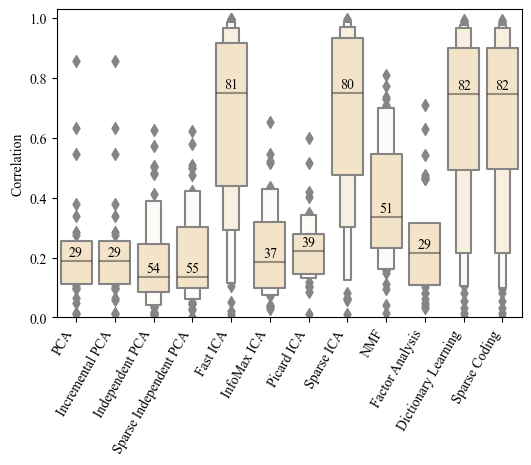

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Load the custom font
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)

# Set plot size
plt.figure(figsize=(6, 4))

# Create the boxen plot with customized color for boxes
boxen_plot = sns.boxenplot(data=df_correlations, y='correlation', x='method', orient='v', 
                           color='#fae5c1')

# Get xtick labels and apply the custom font and rotation
xticks = [label.get_text() for label in boxen_plot.get_xticklabels()]
boxen_plot.set_xticklabels(xticks, fontproperties=font_prop, rotation=60, ha="right")

# Set y-tick labels with specific ticks from 0 to 1 with an interval of 0.2
yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Define y-ticks
boxen_plot.set_yticks(yticks)  # Set y-ticks explicitly
boxen_plot.set_yticklabels([f'{tick:.1f}' for tick in yticks], fontproperties=font_prop)

# Set y-axis limit slightly above the max value (1.05)
plt.ylim([0, 1.03])  # Set the y-axis limit from 0 to 1.05

# Calculate the number of elements for each method
method_counts = df_correlations['method'].value_counts()

# Annotate each box at the median line (or mean if preferred)
for i, method in enumerate(xticks):
    count = method_counts[method]
    
    # Find the median value of the box for each category
    median_y = df_correlations[df_correlations['method'] == method]['correlation'].median()
    
    # Annotate the count on the median line
    boxen_plot.text(i, median_y + 0.005, f'{count}', ha='center', va='bottom', 
                    fontsize=10, color='black', fontproperties=font_prop)

# Remove the x-axis label
boxen_plot.set_xlabel('')  # Removes the 'Methods' label

# Set y-axis label with the custom font
plt.ylabel('Correlation', fontproperties=font_prop)

# Set plot title (empty in this case) with the custom font
plt.title('', fontproperties=font_prop)

plt.savefig('Activity_Correlation_NCA.svg', format='svg')

# Show the plot
plt.show()

In [38]:
df_correlations = pd.DataFrame(columns = ['reg', 'correlation', 'method'])
for method in methods:
    A = A_matrices[method]
    list_components = {key: x[0] for key, x in results_mapping[method].items()}

    correlations_nca = calculate_correlations(A.astype(float), dc_A.astype(float), list_components.keys(), list_components.values())

    component_highest = {}
    for key, val in correlations_nca.items():
        comp = list_components[key]
        if comp not in component_highest.keys() or component_highest[comp][1] < val:
            component_highest[comp] = (key, val)

    
    component_highest = {key: (comp, val) for comp, (key, val) in component_highest.items()}

    for key, vals in component_highest.items():
        df_correlations.loc[str(method) + '_' + str(key)] = [vals[0], vals[1], method]

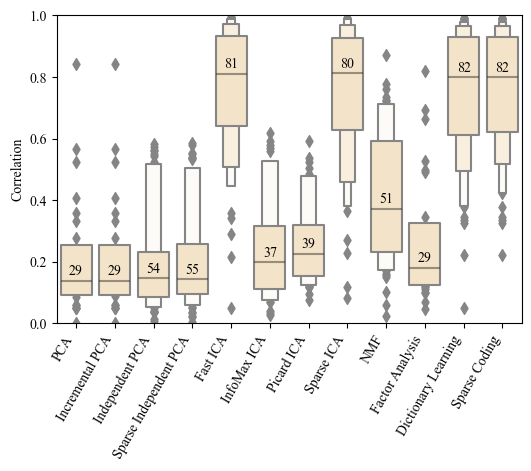

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Load the custom font
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)

# Set plot size
plt.figure(figsize=(6, 4))

# Create the boxen plot with customized color for boxes
boxen_plot = sns.boxenplot(data=df_correlations, y='correlation', x='method', orient='v', 
                           color='#fae5c1')

# Get xtick labels and apply the custom font and rotation
xticks = [label.get_text() for label in boxen_plot.get_xticklabels()]
boxen_plot.set_xticklabels(xticks, fontproperties=font_prop, rotation=60, ha="right")

# Set the y-tick labels with the correct locator
yticks = boxen_plot.get_yticks()  # Get tick positions
boxen_plot.set_yticks(yticks)  # Ensure positions are set
boxen_plot.set_yticklabels([f'{tick:.1f}' for tick in yticks], fontproperties=font_prop)

# Calculate the number of elements for each method
method_counts = df_correlations['method'].value_counts()

# Annotate each box at the median line (or mean if preferred)
for i, method in enumerate(xticks):
    count = method_counts[method]
    
    # Find the median value of the box for each category
    median_y = df_correlations[df_correlations['method'] == method]['correlation'].median()
    
    # Annotate the count on the median line
    boxen_plot.text(i, median_y + 0.007, f'{count}', ha='center', va='bottom', 
                    fontsize=10, color='black', fontproperties=font_prop)

# Remove the x-axis label
boxen_plot.set_xlabel('')  # Removes the 'Methods' label

# Set y-axis limits and label with the custom font
plt.ylim([0, 1])  # Ensure the y-limits are from 0 to 1
plt.ylabel('Correlation', fontproperties=font_prop)

# Set plot title with the custom font
plt.title('', fontproperties=font_prop)

plt.savefig('Activity_Correlation_decoupleR.svg', format='svg')

# Show the plot
plt.show()


# Calculate best correlated regulator component for all enrichments for all components
All enrichments over fdr of 10^-5 are considered, and all regulators have their best correlated component plotted. The n value for each method is how many regulators have at least 1 enrichment and are therefore included in the plot.

In [293]:
def calculate_correlations(df_ICA, df_NCA, list_ICA, list_NCA):
    correlation_dict = {}
    for ica, nca in zip(list_ICA, list_NCA):
        row_A = df_ICA.loc[ica.split('/')[0]]  # Get the row matrix method
        row_NC = df_NCA.loc[nca]  # Get the row from TRN based method
        
        if not row_A.isnull().any() and not row_NC.isnull().any():  # Check for null values
            correlation = np.corrcoef(row_A, row_NC)[0, 1]  # Calculate correlation
        else:
            correlation = np.nan  # Assign NaN if there are any nulls in the row data
        
        correlation_dict[ica] = (abs(correlation), nca)
        
        sorted_correlation_dict = dict(sorted(correlation_dict.items(), key=lambda item: item[1], reverse=True))

    return sorted_correlation_dict

In [294]:
results_mapping = {}
for method, gene_matrix in tqdm(gp_matricies.items()):
    results = {}
    for ica_column in gene_matrix.columns:
        ica_genes = set(gene_matrix.index[gene_matrix[ica_column] == 1])
        trn_enrichment = compute_trn_enrichment(ica_genes,p1k_M.index,trn, fdr=1e-5)
        if len(trn_enrichment) >= 1:
            results[ica_column] = list(trn_enrichment.index)
        results_mapping[method] = results

100%|███████████████████████████████████████████| 12/12 [01:56<00:00,  9.71s/it]


In [295]:
methods = ['PCA', 'incPCA', 'iPCA', 'sIPCA', 'fICA', 'imICA', 'pICA', 'sICA', 'NMF', 'fa', 'dict', 'sc']

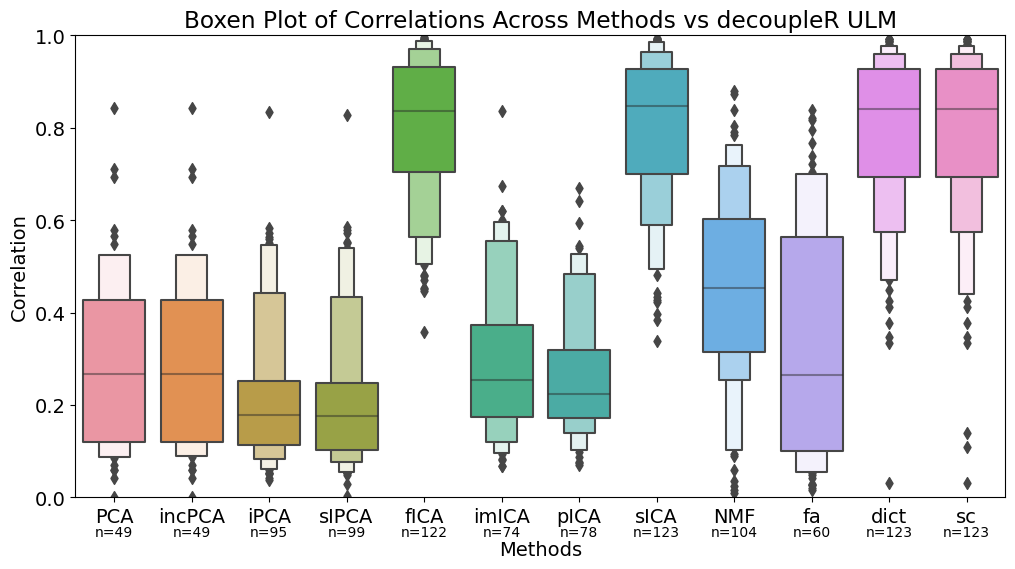

In [320]:
df_correlations = pd.DataFrame(columns = ['reg', 'correlation', 'method'])
for method in methods:
    A = A_matrices[method]
    list_components = {str(key) + '/' + str(i): x[i] for key, x in results_mapping[method].items() for i in range(len(x))}

    correlations_nca = calculate_correlations(A.astype(float), dc_A.astype(float), list_components.keys(), list_components.values())

    component_highest = {}
    for key, vals in correlations_nca.items():
        comp = vals[1]
        if comp not in component_highest.keys() or component_highest[comp][1] < vals[0]:
            component_highest[comp] = (key, vals[0])

    component_highest = {key: (comp, val) for comp, (key, val) in component_highest.items()}

    for key, vals in component_highest.items():
        df_correlations.loc[str(method) + '_' + str(key)] = [vals[0], vals[1], method]

plt.figure(figsize=(12, 6))
boxen_plot = sns.boxenplot(data=df_correlations, y='correlation', x='method', orient='v')
xticks = [label.get_text() for label in boxen_plot.get_xticklabels()]

# Calculate the number of elements for each method and add it to the plot
method_counts = df_correlations['method'].value_counts()

# Annotate each box with the count of elements
for i, method in enumerate(xticks):
    count = method_counts[method]
    boxen_plot.text(i, -0.09, f'n={count}', ha='center', va='bottom', fontsize=10, color='black')

# Adjust the x-axis label position
plt.xlabel('Methods', labelpad=10)  # Increase labelpad to move the label down
plt.ylim([0, 1])
plt.ylabel('Correlation')
plt.title('Boxen Plot of Correlations Across Methods vs decoupleR ULM')
plt.show()


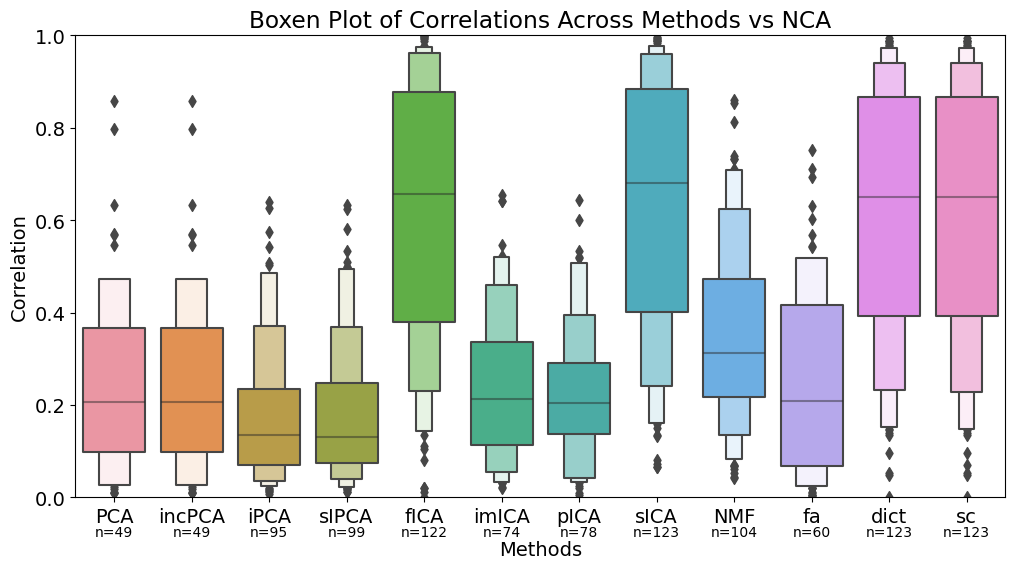

In [297]:
df_correlations = pd.DataFrame(columns = ['reg', 'correlation', 'method'])
for method in methods:
    A = A_matrices[method]
    list_components = {str(key) + '/' + str(i): x[i] for key, x in results_mapping[method].items() for i in range(len(x))}

    correlations_nca = calculate_correlations(A.astype(float), NCA_A.astype(float), list_components.keys(), list_components.values())

    component_highest = {}
    for key, vals in correlations_nca.items():
        comp = vals[1]
        if comp not in component_highest.keys() or component_highest[comp][1] < vals[0]:
            component_highest[comp] = (key, vals[0])

    component_highest = {key: (comp, val) for comp, (key, val) in component_highest.items()}

    for key, vals in component_highest.items():
        df_correlations.loc[str(method) + '_' + str(key)] = [vals[0], vals[1], method]

plt.figure(figsize=(12, 6))
boxen_plot = sns.boxenplot(data=df_correlations, y='correlation', x='method', orient='v')
xticks = [label.get_text() for label in boxen_plot.get_xticklabels()]

# Calculate the number of elements for each method and add it to the plot
method_counts = df_correlations['method'].value_counts()

# Annotate each box with the count of elements
for i, method in enumerate(xticks):
    count = method_counts[method]
    boxen_plot.text(i, -0.09, f'n={count}', ha='center', va='bottom', fontsize=10, color='black')

# Adjust the x-axis label position
plt.xlabel('Methods', labelpad=10)  # Increase labelpad to move the label down
plt.ylim([0, 1])
plt.ylabel('Correlation')
plt.title('Boxen Plot of Correlations Across Methods vs NCA')
plt.show()


# Correlation between NCA and DecoupleR

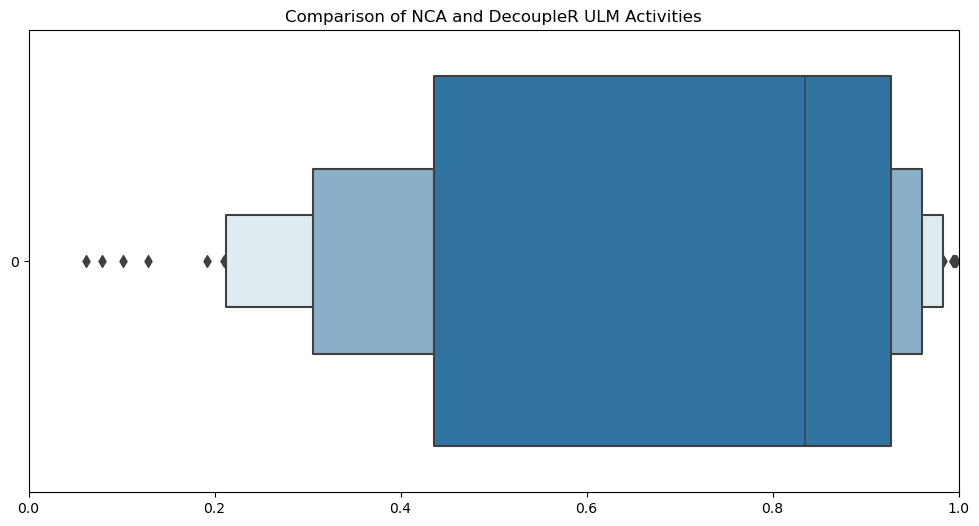

In [30]:
plt.figure(figsize=(12, 6))
test_series = pd.Series(dtype='float64')
for ind in list_components.values():
    test_series.loc[ind] = (np.corrcoef(dc_A.loc[ind], NCA_A.loc[ind])[0, 1])
sns.boxenplot(test_series.abs(), orient='h')
plt.title('Comparison of NCA and DecoupleR ULM Activities');
plt.xlim([0,1]);

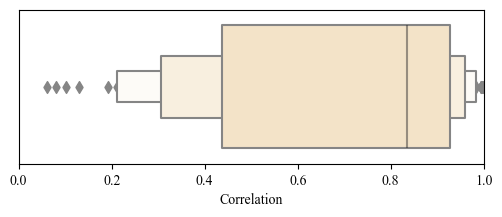

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

# Load the custom font
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)

# Set plot size
plt.figure(figsize=(6, 2))

# Assuming test_series is a pandas Series with data
# Modify your plotting code accordingly
boxen_plot = sns.boxenplot(x=test_series.abs(), orient='h', color='#fae5c1')

# Remove y-ticks
boxen_plot.set_yticks([])

# Get x-tick labels and apply the custom font
xticks = boxen_plot.get_xticks()  # Get x-tick positions
boxen_plot.set_xticks(xticks)  # Ensure positions are set
boxen_plot.set_xticklabels([f'{tick:.1f}' for tick in xticks], fontproperties=font_prop)

# Remove the x-axis label
boxen_plot.set_xlabel('')  # Removes the x-axis label

# Set x-axis limits and label with the custom font
plt.xlim([0, 1])  # Ensure the x-limits are from 0 to 1
plt.xlabel('Correlation', fontproperties=font_prop)

# Set plot title with the custom font
plt.title('', fontproperties=font_prop)

plt.savefig('Activity_Correlation_NCA_decoupleR.svg', format='svg')

# Show the plot
plt.show()


# Plots which show extreme values

In [123]:
results_mapping = {}
for method, gene_matrix in tqdm(gp_matricies.items()):
    results = {}
    for ica_column in gene_matrix.columns:
        ica_genes = set(gene_matrix.index[gene_matrix[ica_column] == 1])
        trn_enrichment = compute_trn_enrichment(ica_genes,p1k_M.index,trn, fdr=1e-5)
        if len(trn_enrichment) >= 1:
            results[ica_column] = (trn_enrichment.iloc[0].name, trn_enrichment.iloc[0].qvalue)
    results_mapping[method] = results

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [02:09<00:00, 10.76s/it]


In [124]:
from scipy.stats import zscore
plotting_data = pd.DataFrame()
for method in tqdm(methods):
    comp = None
    qval=10000000
    for key in [x for x in results_mapping[method].keys() if 'Fur' == results_mapping[method][x][0]]:
        if results_mapping[method][key][1] < qval:
            comp = key
            qval = results_mapping[method][key][1]
    if comp != None:
        plotting_data[method + '_' + comp] = A_matrices[method].loc[comp]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 3136.12it/s]


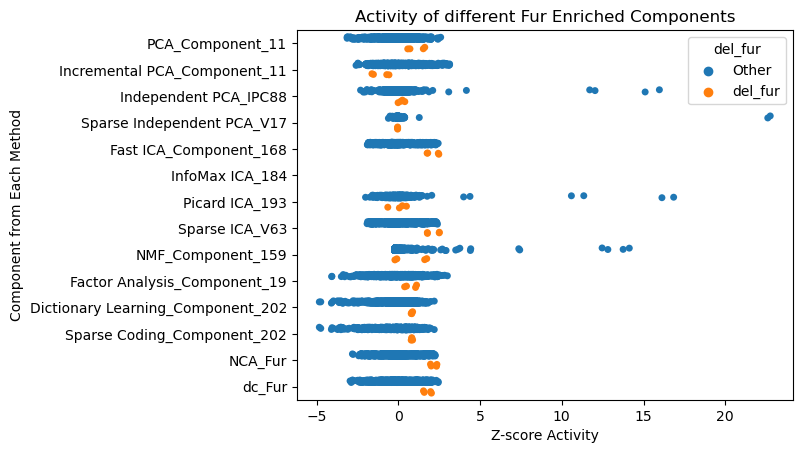

In [111]:
plotting_data['NCA_Fur'] = NCA_A.loc['Fur']
plotting_data['dc_Fur'] = dc_A.loc['Fur']
plotting_data = plotting_data.transform(zscore)
plotting_data.loc[['p1k_00007','p1k_00008','p1k_00009','p1k_00010'], 'del_fur'] = 'del_fur'
plotting_data = plotting_data.fillna('Other')

plt_data = plotting_data.melt(id_vars=['del_fur'])
# Convert 'value' to numeric, coercing errors to NaN
plt_data['value'] = pd.to_numeric(plt_data['value'], errors='coerce')

# Create the numeric representation of 'variable' with the correct order
plt_data['variable'] = pd.Categorical(plt_data['variable'], categories=plt_data.variable.unique())
plt_data['variable_numeric'] = plt_data['variable'].cat.codes

sns.stripplot(data=plt_data, x='value', y='variable', hue='del_fur', jitter=True, dodge=True);
plt.title('Activity of different Fur Enriched Components')
plt.xlabel('Z-score Activity')
plt.ylabel('Component from Each Method');

In [112]:
plotting_data.columns

Index(['PCA_Component_11', 'Incremental PCA_Component_11',
       'Independent PCA_IPC88', 'Sparse Independent PCA_V17',
       'Fast ICA_Component_168', 'InfoMax ICA_184', 'Picard ICA_193',
       'Sparse ICA_V63', 'NMF_Component_159', 'Factor Analysis_Component_19',
       'Dictionary Learning_Component_202', 'Sparse Coding_Component_202',
       'NCA_Fur', 'dc_Fur', 'del_fur'],
      dtype='object')

In [113]:
plotting_data.rename(columns={'Sparse Independent PCA_V17': ' Sparse_Independent_PCA_Component_17'}, inplace=True)
plotting_data.rename(columns={'Incremental PCA_Component_11': 'Incremental_PCA_Component_11'}, inplace=True)
plotting_data.rename(columns={'Independent PCA_IPC88': 'Independent_PCA_Component_88'}, inplace=True)
plotting_data.rename(columns={'Fast ICA_Component_168': 'Fast_ICA_Component_168'}, inplace=True)
plotting_data.rename(columns={'InfoMax ICA_184': 'InfoMax_ICA_Component_184'}, inplace=True)
plotting_data.rename(columns={'Picard ICA_193': 'Picard_ICA_Component_193'}, inplace=True)
plotting_data.rename(columns={'Sparse ICA_V63': 'Sparse_ICA_Component_63'}, inplace=True)
plotting_data.rename(columns={'Factor Analysis_Component_19': 'Factor_Analysis_Component_19'}, inplace=True)
plotting_data.rename(columns={'Dictionary Learning_Component_202': 'Dictionary_Learning_Component_202'}, inplace=True)
plotting_data.rename(columns={'Sparse Coding_Component_202': 'Sparse_Coding_Component_202'}, inplace=True)
plotting_data.rename(columns={'dc_Fur': 'decoupleR_Fur'}, inplace=True)

In [114]:
plt_data = plotting_data.melt(id_vars=['del_fur'])
# Convert 'value' to numeric, coercing errors to NaN
plt_data['value'] = pd.to_numeric(plt_data['value'], errors='coerce')

# Create the numeric representation of 'variable' with the correct order
plt_data['variable'] = pd.Categorical(plt_data['variable'], categories=plt_data.variable.unique())
plt_data['variable_numeric'] = plt_data['variable'].cat.codes

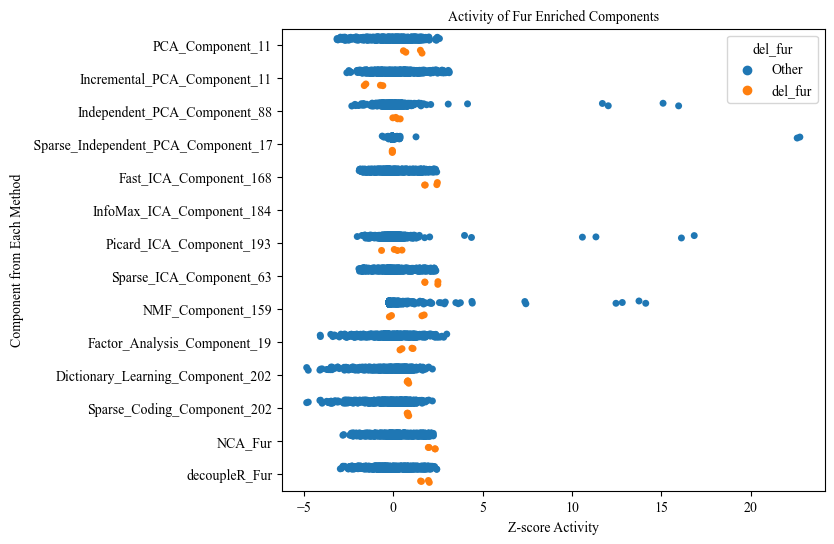

In [115]:
# Set the font
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# Create the plot
plt.figure(figsize=(7, 6))
sns.stripplot(data=plt_data, x='value', y='variable', hue='del_fur', jitter=True, dodge=True)
plt.title('Activity of Fur Enriched Components', fontproperties=font_prop)
plt.xlabel('Z-score Activity', fontproperties=font_prop)
plt.ylabel('Component from Each Method', fontproperties=font_prop)
legend = plt.legend(title='del_fur', prop=font_prop, title_fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

# Save the plot
plt.savefig('activity_Fur_comparison.svg')
plt.show()

In [116]:
plotting_data = pd.DataFrame()
for method in tqdm(methods):
    comp = None
    qval=10000000
    for key in [x for x in results_mapping[method].keys() if 'Cra' == results_mapping[method][x][0]]:
        if results_mapping[method][key][1] < qval:
            comp = key
            qval = results_mapping[method][key][1]
    if comp != None:
        plotting_data[method + '_' + comp] = A_matrices[method].loc[comp]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 3656.23it/s]


In [117]:
plotting_data.columns

Index(['PCA_Component_127', 'Incremental PCA_Component_127',
       'Independent PCA_IPC121', 'Sparse Independent PCA_V120',
       'Fast ICA_Component_222', 'Sparse ICA_V216', 'NMF_Component_53',
       'Dictionary Learning_Component_125', 'Sparse Coding_Component_125'],
      dtype='object')

In [118]:
plotting_data['NCA_Cra'] = NCA_A.loc['Cra']
plotting_data['dc_Cra'] = dc_A.loc['Cra']
plotting_data = plotting_data.transform(zscore)
plotting_data.loc[sample_data[sample_data.condition.str.contains('delcra')].index, 'del_cra'] = 'del_cra'
plotting_data = plotting_data.fillna('Other')

In [119]:
plotting_data.rename(columns={'Incremental PCA_Component_127': 'Incremental_PCA_Component_127'}, inplace=True)
plotting_data.rename(columns={'Independent PCA_IPC121': 'Independent_PCA_Component_121'}, inplace=True)
plotting_data.rename(columns={'Sparse Independent PCA_V120': 'Sparse_Independent_PCA_Component_120'}, inplace=True)
plotting_data.rename(columns={'Fast ICA_Component_222': 'Fast_ICA_Component_222'}, inplace=True)
plotting_data.rename(columns={'Sparse ICA_V216': 'Sparse_ICA_Component_216'}, inplace=True)
# plotting_data.rename(columns={'InfoMax ICA_184': 'InfoMax_ICA_Component_184'}, inplace=True)
# plotting_data.rename(columns={'Picard ICA_193': 'Picard_ICA_Component_193'}, inplace=True)
# plotting_data.rename(columns={'Factor Analysis_Component_19': 'Factor_Analysis_Component_19'}, inplace=True)
plotting_data.rename(columns={'Dictionary Learning_Component_125': 'Dictionary_Learning_Component_125'}, inplace=True)
plotting_data.rename(columns={'Sparse Coding_Component_125': 'Sparse_Coding_Component_125'}, inplace=True)
plotting_data.rename(columns={'dc_Cra': 'decoupleR_Cra'}, inplace=True)

In [120]:

plt_data = plotting_data.melt(id_vars=['del_cra'])
# Convert 'value' to numeric, coercing errors to NaN
plt_data['value'] = pd.to_numeric(plt_data['value'], errors='coerce')

# Create the numeric representation of 'variable' with the correct order
plt_data['variable'] = pd.Categorical(plt_data['variable'], categories=plt_data.variable.unique())
plt_data['variable_numeric'] = plt_data['variable'].cat.codes

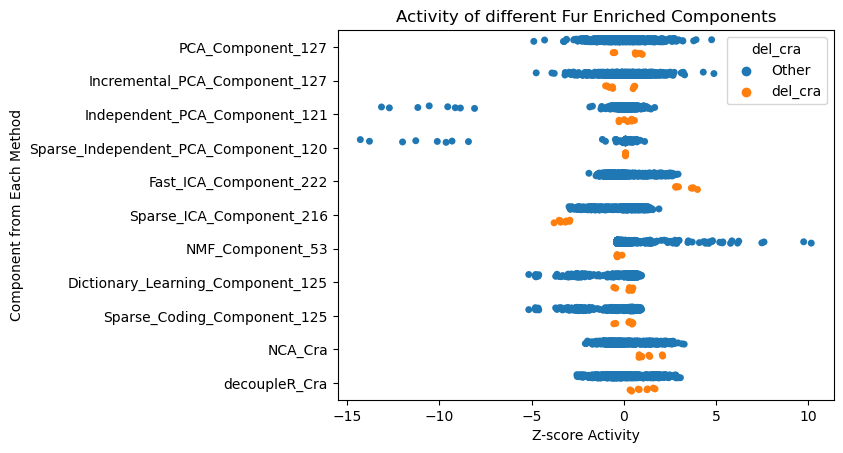

In [121]:
sns.stripplot(data=plt_data, x='value', y='variable', hue='del_cra', jitter=True, dodge=True);
plt.title('Activity of different Fur Enriched Components')
plt.xlabel('Z-score Activity')
plt.ylabel('Component from Each Method');

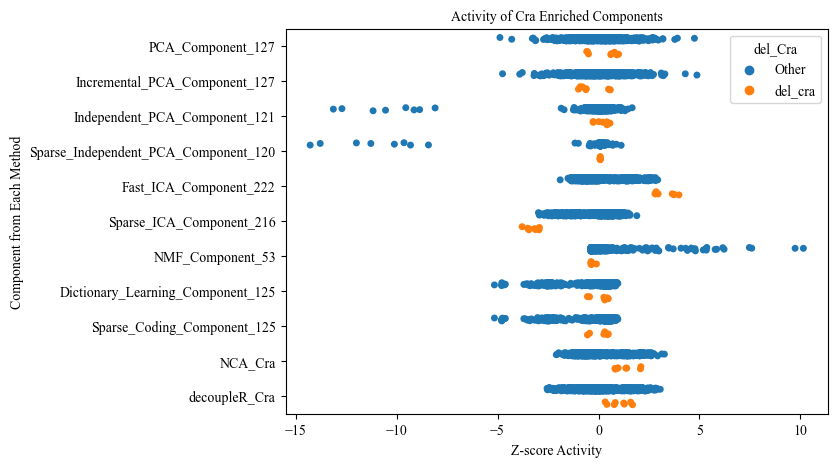

In [122]:
# Set the font
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# Create the plot
plt.figure(figsize=(7, 5))
sns.stripplot(data=plt_data, x='value', y='variable', hue='del_cra', jitter=True, dodge=True)
plt.title('Activity of Cra Enriched Components', fontproperties=font_prop)
plt.xlabel('Z-score Activity', fontproperties=font_prop)
plt.ylabel('Component from Each Method', fontproperties=font_prop)
legend = plt.legend(title='del_Cra', prop=font_prop, title_fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

# Save the plot
plt.savefig('activity_Cra_comparison.svg')
plt.show()

In [93]:
plotting_data = pd.DataFrame()
for method in tqdm(methods):
    comp = None
    qval=10000000
    for key in [x for x in results_mapping[method].keys() if 'PhoB' == results_mapping[method][x][0]]:
        if results_mapping[method][key][1] < qval:
            comp = key
            qval = results_mapping[method][key][1]
    if comp != None:
        plotting_data[method + '_' + comp] = A_matrices[method].loc[comp]
plotting_data['NCA_PhoB'] = NCA_A.loc['PhoB']
plotting_data['dc_PhoB'] = dc_A.loc['PhoB']
plotting_data = plotting_data.transform(zscore)
plotting_data.loc[sample_data[sample_data.condition.str.contains('del_phoB')].index, 'del_PhoB'] = 'del_PhoB'
plotting_data = plotting_data.fillna('Other')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1869.40it/s]


In [94]:
plt_data = plotting_data.melt(id_vars=['del_PhoB'])
# Convert 'value' to numeric, coercing errors to NaN
plt_data['value'] = pd.to_numeric(plt_data['value'], errors='coerce')

# Create the numeric representation of 'variable' with the correct order
plt_data['variable'] = pd.Categorical(plt_data['variable'], categories=plt_data.variable.unique())
plt_data['variable_numeric'] = plt_data['variable'].cat.codes

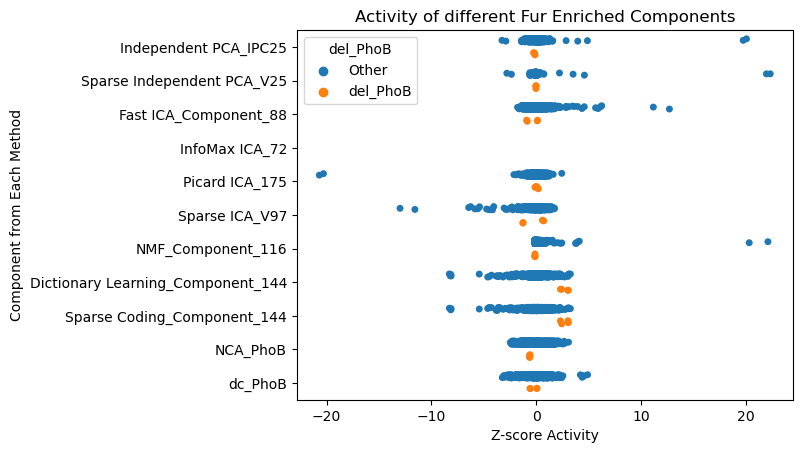

In [95]:
sns.stripplot(data=plt_data, x='value', y='variable', hue='del_PhoB', jitter=True, dodge=True);
plt.title('Activity of different Fur Enriched Components')
plt.xlabel('Z-score Activity')
plt.ylabel('Component from Each Method');

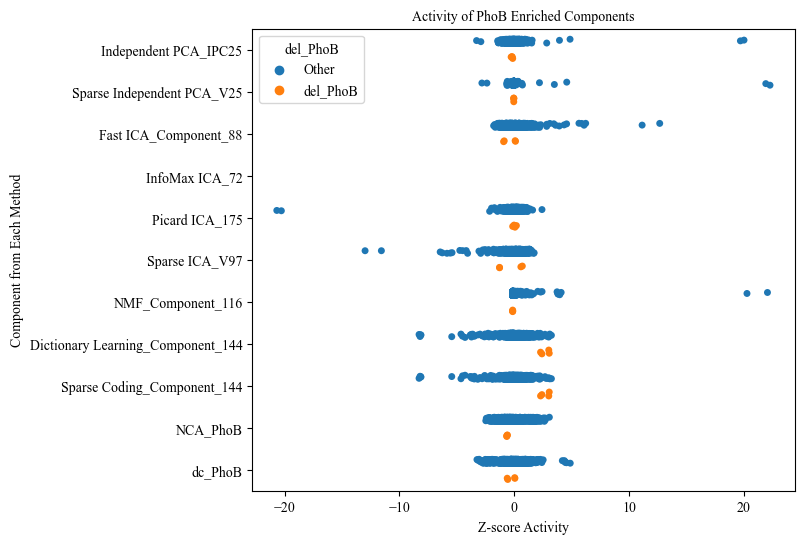

In [96]:
# Set the font
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# Create the plot
plt.figure(figsize=(7, 6))
sns.stripplot(data=plt_data, x='value', y='variable', hue='del_PhoB', jitter=True, dodge=True)
plt.title('Activity of PhoB Enriched Components', fontproperties=font_prop)
plt.xlabel('Z-score Activity', fontproperties=font_prop)
plt.ylabel('Component from Each Method', fontproperties=font_prop)
legend = plt.legend(title='del_PhoB', prop=font_prop, title_fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

# Save the plot
plt.savefig('activity_PhoB_comparison.svg', bbox_inches='tight')
plt.show()